In [1]:
"""
    Steps for data cleaning and Exploratory Data Analysis
    1. Check if training record is unique.
    2. Check if Training and Test datasets are distinct.
    3. Check if data contains null values.
    4. Check the data type information
"""

import pandas as pd
import numpy as np
import csv as csv

In [2]:
train_dataset = pd.read_csv('data/titanic/train.csv')
test_dataset = pd.read_csv('data/titanic/test.csv')

In [3]:
train_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
test_dataset.shape


(418, 11)

In [5]:
# check if the passengerId is unique
print("ID is unique") if train_dataset.PassengerId.nunique() == train_dataset.shape[0] else print("Invalid data")

# check if the training dataset and testing dataset are distinct
intersection = np.intersect1d(train_dataset.PassengerId.values, test_dataset.PassengerId.values)
print("Training and test data are distinct") if len(intersection) == 0 else print("wrong")

data_has_nan = False
if train_dataset.count().min() == train_dataset.shape[0] and test_dataset.count().min() == test_dataset.shape[0]:
    print("we need not to worry about nan")
else:
    data_has_nan = True
    print("data has nan")

ID is unique
Training and test data are distinct
data has nan


In [6]:
print("Training dataset column type information")
dtype_df = train_dataset.dtypes.reset_index()
dtype_df.columns = ["count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

Training dataset column type information


,Column Type,count
0,int64,5
1,float64,2
2,object,5


In [7]:
print("Training dataset info...")

Training dataset info...


In [8]:
dtype_df

,count,Column Type
0,PassengerId,int64
1,Survived,int64
2,Pclass,int64
3,Name,object
4,Sex,object
5,Age,float64
6,SibSp,int64
7,Parch,int64
8,Ticket,object
9,Fare,float64


In [9]:
if data_has_nan:
    nas = pd.concat([train_dataset.isnull().sum(), test_dataset.isnull().sum()], axis=1, keys=['Train Dataset', 'Test Dataset'], sort=True)
    print("Nan in the datasets")
    print(nas[nas.sum(axis=1) > 0])

Nan in the datasets
          Train Dataset  Test Dataset
Age                 177          86.0
Cabin               687         327.0
Embarked              2           0.0
Fare                  0           1.0


In [10]:
survived = train_dataset[train_dataset['Survived'] == 1]['Sex'].value_counts()
dead = train_dataset[train_dataset['Survived'] == 0]['Sex'].value_counts()
sf = pd.DataFrame([survived, dead])
sf.index = ['Survived', 'Dead']


# import python lib for visualization 

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

To Visualize categorical features we need to use bar chart. The data has following categorical features
1. Pclass
2. Sex
3. SibSp
4. Parch
5. Embarked
6. Cabin

In [12]:
def bar_chart(feature):
    survived = train_dataset[train_dataset['Survived'] == 1][feature].value_counts()
    dead = train_dataset[train_dataset['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

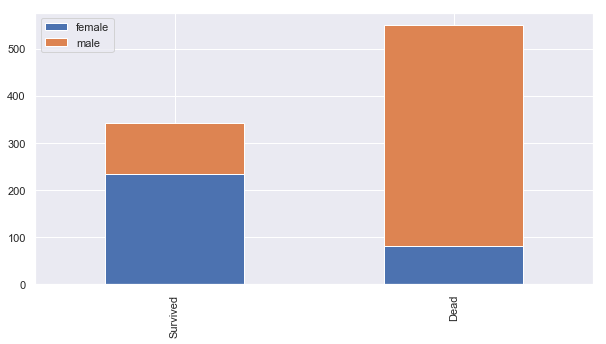

In [13]:
bar_chart('Sex')

# This chart confirms that female has more chance of getting survived

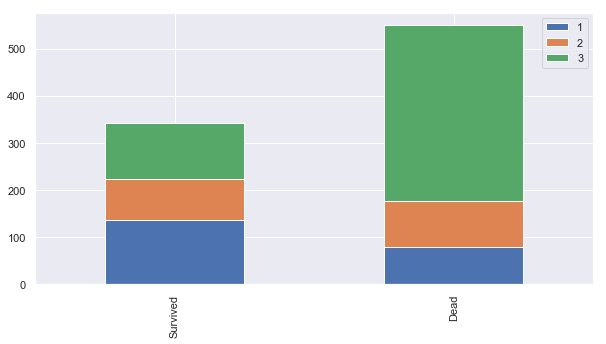

In [14]:
bar_chart('Pclass')

This chart confirms that class 1 has more chance of survival and class 3 has more chance of being.

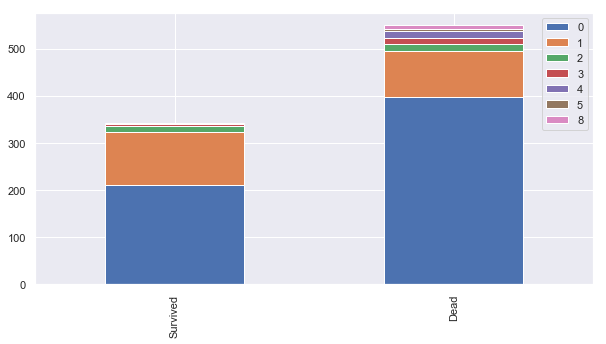

In [15]:
bar_chart('SibSp')

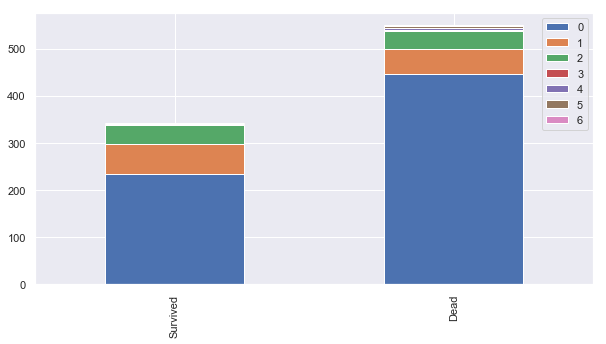

In [16]:
bar_chart('Parch')

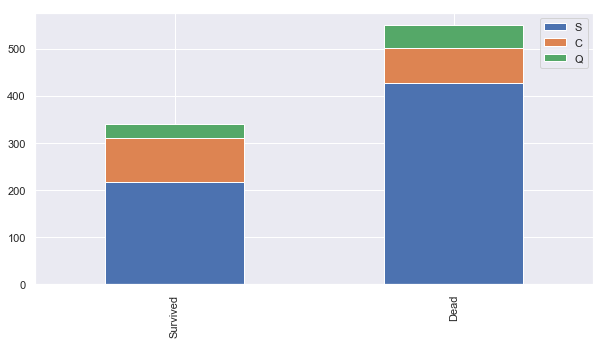

In [17]:
bar_chart('Embarked')

# Feature engineering
Feature engineering is the process of using domain knowledge of the data
to create features (feature vectors) that make machine learning algorithms work.

feature vector is an n-dimensional vector of numerical features that represent some object.
Many algorithms in machine learning require a numerical representation of objects,
since such representations facilitate processing and statistical analysis 

In [18]:
train_test_dataset = [train_dataset, test_dataset]
for data in train_test_dataset:
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [19]:
train_dataset['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Capt          1
Ms            1
Mme           1
Countess      1
Jonkheer      1
Lady          1
Don           1
Sir           1
Name: Title, dtype: int64

In [20]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for data in train_test_dataset:
    data['Title'] = data['Title'].map(title_mapping)

In [21]:
train_dataset['Title'].value_counts()

0    517
1    182
2    125
3     67
Name: Title, dtype: int64

In [22]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


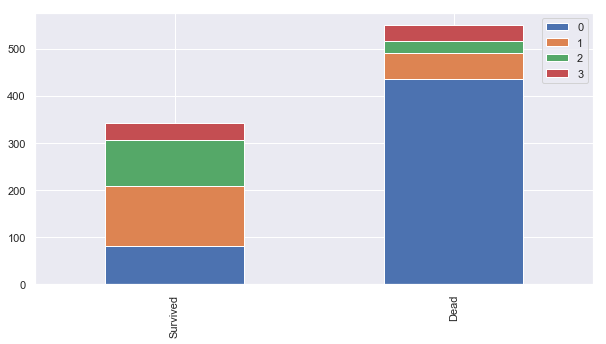

In [23]:
bar_chart('Title')

In [24]:
train_dataset.drop('Name', axis=1, inplace=True)
test_dataset.drop('Name', axis=1, inplace=True)

In [25]:
train_dataset

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C,2


In [26]:
# sex
sex_mapping = {'male': 0, 'female':1}
for dataset in train_test_dataset:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [27]:
train_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


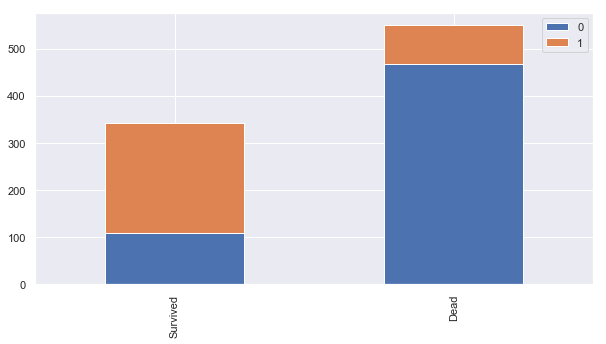

In [28]:
bar_chart('Sex')

In [29]:
train_dataset['Age'].fillna(train_dataset.groupby('Title')['Age'].transform('median'), inplace=True)
test_dataset['Age'].fillna(test_dataset.groupby('Title')['Age'].transform('median'), inplace=True)

In [30]:
train_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [31]:
def fact_grid(feature, x_lim1=None, x_lim2=None):
    facet = sns.FacetGrid(train_dataset, hue="Survived",aspect=4)
    facet.map(sns.kdeplot,feature,shade= True)
    facet.set(xlim=(0, train_dataset[feature].max()))
    facet.add_legend()
    if x_lim1 != None and x_lim2 != None:
        plt.xlim(x_lim1, x_lim2)

/Users/vikaspandey/miniconda2/envs/datascience/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


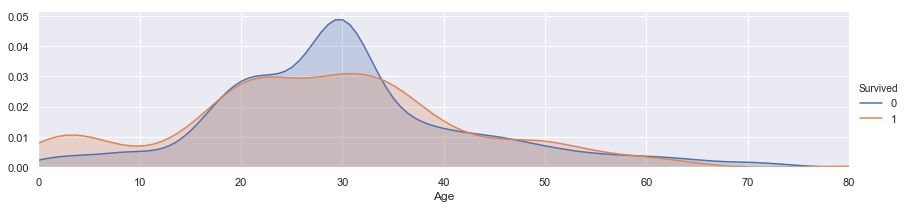

In [32]:
fact_grid('Age')

/Users/vikaspandey/miniconda2/envs/datascience/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


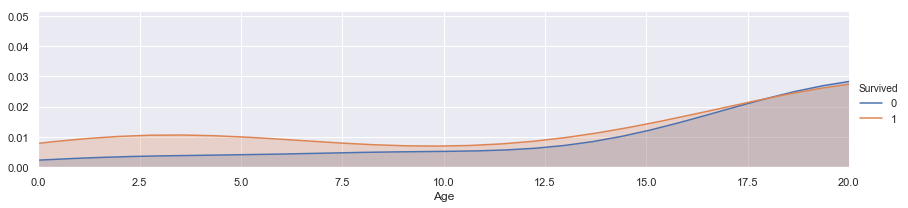

In [33]:
fact_grid('Age', 0, 20)

/Users/vikaspandey/miniconda2/envs/datascience/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


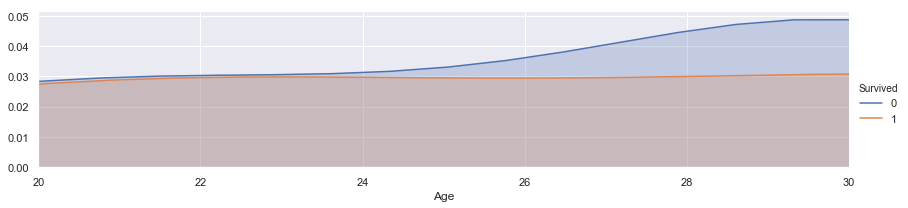

In [34]:
fact_grid('Age', 20, 30)

/Users/vikaspandey/miniconda2/envs/datascience/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


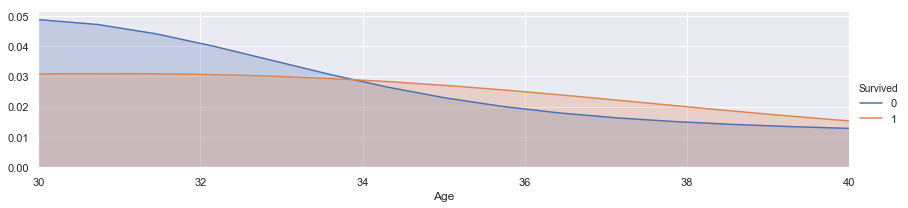

In [35]:
fact_grid('Age', 30, 40)

/Users/vikaspandey/miniconda2/envs/datascience/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


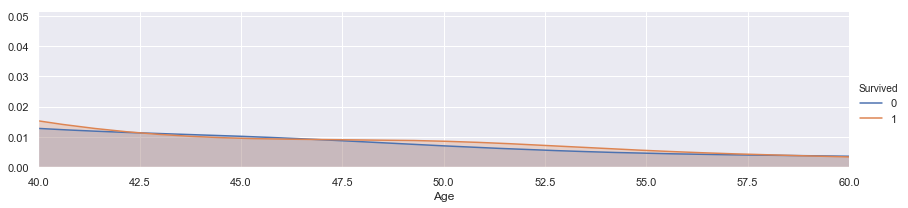

In [36]:
fact_grid('Age', 40, 60)

/Users/vikaspandey/miniconda2/envs/datascience/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


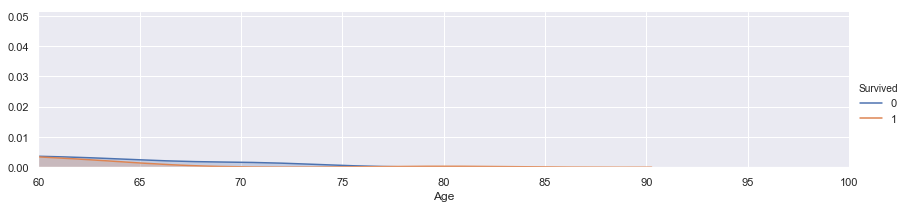

In [37]:
fact_grid('Age', 60, 100)

# Binning -> Converting numerical age to categorical variable

In [38]:
for dataset in train_test_dataset:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

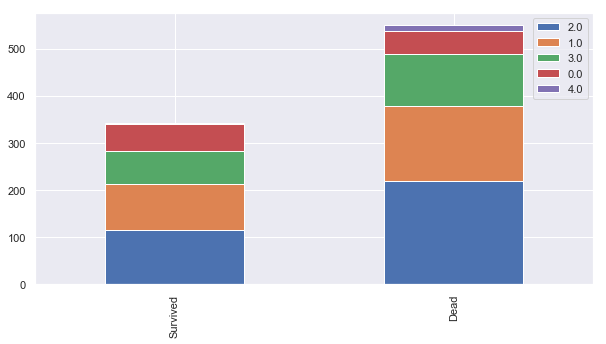

In [39]:
bar_chart('Age')

## Embarked

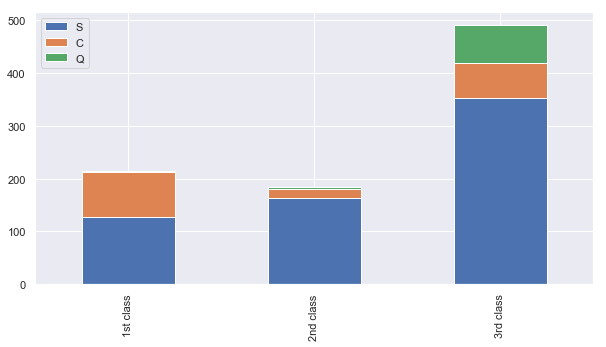

In [40]:
p_class1 = train_dataset[train_dataset['Pclass'] == 1]['Embarked'].value_counts()
p_class2 = train_dataset[train_dataset['Pclass'] == 2]['Embarked'].value_counts()
p_class3 = train_dataset[train_dataset['Pclass'] == 3]['Embarked'].value_counts()
df = pd.DataFrame([p_class1, p_class2, p_class3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

## since port 'S' is in majority in all 3 cases, so we can fill null value by 'S'

In [41]:
for dataset in train_test_dataset:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_dataset:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [42]:
train_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


In [43]:
train_dataset['Fare'].fillna(train_dataset.groupby('Pclass')['Fare'].transform("median"), inplace=True)
test_dataset['Fare'].fillna(test_dataset.groupby('Pclass')['Fare'].transform("median"), inplace=True)

In [44]:
train_dataset.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


/Users/vikaspandey/miniconda2/envs/datascience/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


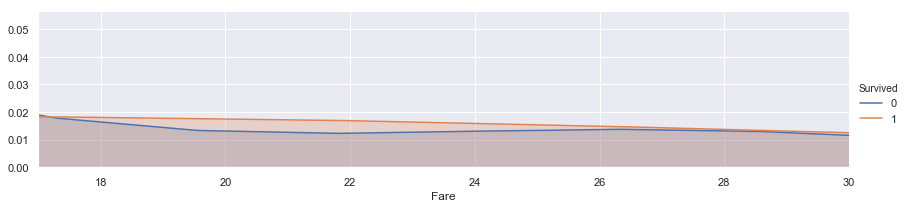

In [45]:
fact_grid('Fare', 17, 30)

In [46]:
for dataset in train_test_dataset:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [47]:
train_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [48]:
for dataset in train_test_dataset:
    dataset['Cabin'] = dataset['Cabin'].str[:1]
p_class1_cabin = train_dataset[train_dataset["Pclass"] == 1]['Cabin'].value_counts()
p_class2_cabin = train_dataset[train_dataset["Pclass"] == 2]['Cabin'].value_counts()
p_class3_cabin = train_dataset[train_dataset["Pclass"] == 3]['Cabin'].value_counts()
df = pd.DataFrame([p_class1_cabin, p_class2_cabin, p_class3_cabin])
df.index = ['1st class','2nd class', '3rd class']
#df.plot(kind='bar',stacked=True, figsize=(20,10))
p_class1_cabin


C    59
B    47
D    29
E    25
A    15
T     1
Name: Cabin, dtype: int64

In [49]:
p_class2_cabin


F    8
E    4
D    4
Name: Cabin, dtype: int64

In [50]:
p_class3_cabin

F    5
G    4
E    3
Name: Cabin, dtype: int64

In [51]:
176 + 12 + 16

204

In [52]:
204/8

25.5

In [53]:
15/25.5

0.5882352941176471

In [54]:
32/25.5

1.2549019607843137

In [55]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_dataset:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [56]:
train_dataset["Cabin"].fillna(train_dataset.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test_dataset["Cabin"].fillna(test_dataset.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [57]:
train_dataset["FamilySize"] = train_dataset["SibSp"] + train_dataset["Parch"] + 1
test_dataset["FamilySize"] = test_dataset["SibSp"] + test_dataset["Parch"] + 1

/Users/vikaspandey/miniconda2/envs/datascience/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


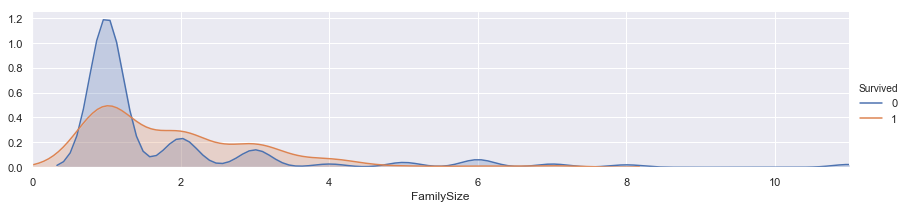

In [58]:
fact_grid('FamilySize')

In [59]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_dataset:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [60]:
train_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [61]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train_dataset = train_dataset.drop(features_drop, axis=1)
test_dataset = test_dataset.drop(features_drop, axis=1)
train_dataset = train_dataset.drop(['PassengerId'], axis=1)

In [62]:
train_data = train_dataset.drop('Survived', axis=1)
target = train_dataset['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [63]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0


In [64]:
train_dataset.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,1,3.0,2.0,0.8,1,2,0.4
2,1,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,1,2.0,2.0,0.8,0,2,0.4
4,0,3,0,2.0,0.0,2.0,0,0,0.0


In [65]:
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

/Users/vikaspandey/miniconda2/envs/datascience/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [66]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.80898876 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.83146067 0.86516854]


In [67]:
round(np.mean(score)*100,2)

83.5

In [69]:
clf = SVC()
clf.fit(train_data, target)

test_data = test_dataset.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [71]:
submission = pd.DataFrame({
        "PassengerId": test_dataset["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [72]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
